Processando base de dados

Variáveis: file, alg, min_support

In [3]:
import importlib
import utils.pre_processing_news as ppn

importlib.reload(ppn)

file = "manifestacao_bolsonaro"
#file = "resgate_juliana_marins"
#file = "morte_juliana_marins"

input_file = "datasets/" + file + ".csv"

# 1. Pré processando base de dados
print("Pré-processando textos...")
pre_processing_result, txt_database = ppn.pre_processing_database(input_file)

Pré-processando textos...


Gerando Trie of Rules

Gerando árvore de regras (TOR)...


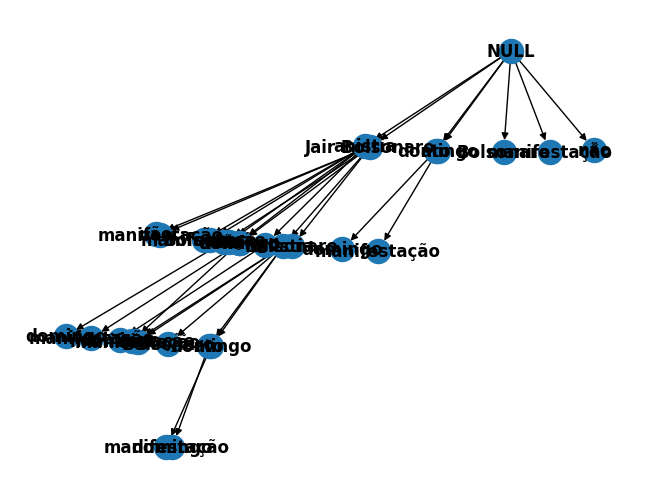

In [ ]:
from trieofrules import trieofrules

#supported algorithms: FP-max, FP-growth, Apriori
alg = 'Apriori'
#alg = 'FP-max'
min_support = 0.78

file_name = f"{file}_{alg}_{min_support}"
output_file = f"outputs/{file_name}.graphml"

# 2. Gera o TOR (Trie of Rules) a partir dos dados
print("Gerando árvore de regras (TOR)...")
TOR = trieofrules(data=pre_processing_result, alg=alg, min_support=min_support)
TOR.draw()

In [11]:
# 3. Salva a visualização e estrutura como .graphml
print("Salvando .graphml...")
TOR.save_graph(filename=output_file)

Salvando .graphml...


Analisando contexto das ocorrências

In [20]:
importlib.reload(ppn)

palavra_mais_usada = next(iter(TOR.frequent_items)).lower() 
ppn.concordance(txt_database, palavra_mais_usada)

Número de ocorrências: 23

              o ato com o ex-presidente jair bolsonaro (pl) na avenida paulista neste domingo 
 uma democracia.   por volta das 15h40, jair bolsonaro discursou e pediu anistia para os preso
s", mas disse que "eleições em 2026 sem jair bolsonaro é negar a democracia, é escancarar a di
de 2 pontos.  o ato com o ex-presidente jair bolsonaro (pl) e diversos aliados na avenida paul
bolsonaro disse que “eleições em 26 sem jair bolsonaro é negar a democracia, é escancarar a di
ta da presença de público, o comício de jair bolsonaro na avenida paulista pode ser classifica
eita chegar forte a 2026 sem o apoio de jair bolsonaro. tarcísio parece cada vez mais em campa
 tarde deste domingo pelo ex-presidente jair bolsonaro (pl) e o pastor silas malafaia na aveni
e campanha à reeleição. o ex-presidente jair bolsonaro (pl) reuniu cerca de 44,9 mil apoiadore
curso de bolsonaro por volta das 15h40, jair bolsonaro discursou e pediu anistia para os preso
s", mas disse que "elei

Ranking de palavras p/ Nuvem de palavras

In [ ]:
import csv
import os
import importlib
import utils.analize_tor as ator

importlib.reload(ator)

pasta = "outputs_clusters_csv"
os.makedirs(pasta, exist_ok=True)

ranking = ator.ranking_words(pre_processing_result)
caminho = os.path.join(pasta, f"{file_name}_ranking_palavras.csv")
with open(caminho, mode="w", newline="", encoding="utf-8") as arquivo_csv:
    writer = csv.writer(arquivo_csv)
    writer.writerows(ranking)